In [7]:
%pip install -Uq rich pandas numpy scipy 
%pip install -Uq matplotlib seaborn plotly 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import math

from rich import print
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
rides = pd.read_csv('rides_go.csv')
subscriptions = pd.read_csv('subscriptions_go.csv')
users = pd.read_csv('users_go.csv')

In [11]:
rides['date'] = pd.to_datetime(rides['date'])
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [12]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [9]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [10]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


## Изучаем RIDES

In [4]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [15]:
px.histogram(rides, x='duration', marginal='box')

In [16]:
px.histogram(rides, x='distance', marginal='box')

## Изучаем USERS

In [17]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<Axes: ylabel='count'>

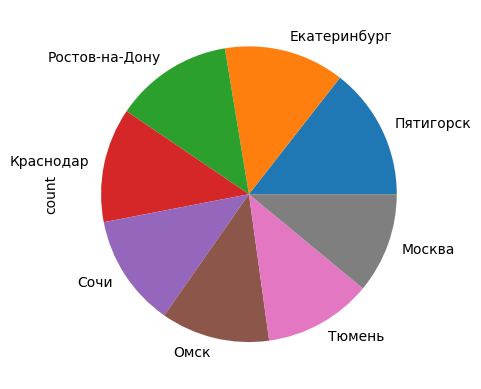

In [18]:
users.city.value_counts().plot.pie()

In [19]:
for city in users.city.value_counts().index:
    print(
        f"{city:>15}: {users.query('city == @city').shape[0] / users.city.shape[0]:.2%} " +
        f"({users.query('city == @city').shape[0]}/{users.city.shape[0]})"
    )

Пятигорск: 14.44% (226/1565)

Екатеринбург: 13.16% (206/1565)

Ростов-на-Дону: 12.91% (202/1565)

Краснодар: 12.52% (196/1565)

Сочи: 12.27% (192/1565)

Омск: 11.88% (186/1565)

Тюмень: 11.82% (185/1565)

Москва: 10.99% (172/1565)

<Axes: ylabel='count'>

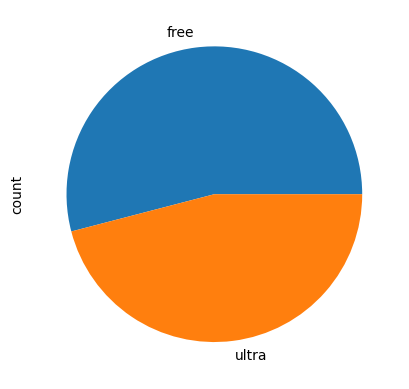

In [21]:
users.subscription_type.value_counts().plot.pie()

In [22]:
px.histogram(
    users, 
    x='age', 
    marginal='box'
)

## Соединяем данные

In [31]:
data = users.merge(rides, on='user_id')
data['date_month'] = data['date'].dt.month
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [32]:
px.histogram(data, x='distance', color='subscription_type')

In [33]:
data_free = data.query('subscription_type == "free"')
data_ultra = data.query('subscription_type == "ultra"')
display(data_free.head())
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
6672,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1
6673,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2
6674,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2
6675,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2
6676,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2


,user_id,name,age,city,subscription_type,distance,duration,date,date_month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [34]:
# cd - ceiled duration
data_cd = data
data_cd.duration = data_cd.duration.apply(np.ceil)

In [35]:
users_pivot = pd.pivot_table(
    data_cd, 
    index=['user_id', 'date_month'],
    #columns=['subscription_type'],
    values=['distance', 'duration'], 
    aggfunc={
        'distance': 'sum',
        'user_id': 'count',
        'duration': 'sum',
    }
)
users_pivot.columns = ['month_distance', 'month_duration', 'month_rides']
users_pivot['subscription_type'] = \
    users_pivot.apply(lambda x: users[users.user_id == x.name[0]].iloc[0][-1], axis=1)
users_pivot.head(10)

/var/folders/l2/_6d5n2p54sn27n5xtkf7yvxh0000gn/T/ipykernel_81858/1432431375.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



month_distance  month_duration  month_rides  \
user_id date_month                                                
1       1              7027.511294            42.0            2   
        4               754.159807             7.0            1   
        8              6723.470560            46.0            2   
        10             5809.911100            32.0            2   
        11             7003.499363            56.0            3   
        12             6751.629942            28.0            2   
2       3             10187.723006            63.0            3   
        4              6164.381824            40.0            2   
        6              3255.338202            14.0            1   
        7              6780.722964            48.0            2   

                   subscription_type  
user_id date_month                    
1       1                      ultra  
        4                      ultra  
        8                      ultra  
        10                     ultra  
        11                     ultra  
        12                     ultra  
2       3                      ultra  
        4                      ultra  
        6                      ultra  
        7                      ultra

In [36]:
users_pivot.tail(10)

month_distance  month_duration  month_rides  \
user_id date_month                                                
1533    8              4581.943632            22.0            1   
        11             3414.448028            26.0            1   
1534    1              4678.415899            16.0            1   
        2              2103.914120            14.0            1   
        4              3434.290912            15.0            1   
        6              3409.468534            26.0            2   
        8              7622.453034            48.0            2   
        9              4928.173852            23.0            1   
        11            13350.015305            78.0            4   
        12             2371.711192            16.0            1   

                   subscription_type  
user_id date_month                    
1533    8                       free  
        11                      free  
1534    1                       free  
        2                       free  
        4                       free  
        6                       free  
        8                       free  
        9                       free  
        11                      free  
        12                      free

In [38]:
import warnings

def calculate_month_income(series: pd.Series) -> int:
    user_id: int = series.name[0]
    duration: int = np.ceil(series.month_duration)
    rides_count: int = series.month_rides
    subscription_type: str = series.subscription_type

    type_prices = subscriptions[subscriptions.subscription_type == subscription_type]
    
    # тут использую инты для ускорения работы, так как тут всё равно неоткуда появиться
    # дробям в нынешней итерации - всё слишком округлённое по заданию
    # но в идеале бы всё во float
    total_income: int = int(type_prices.subscription_fee)
    total_income += int(rides_count * type_prices.start_ride_price)
    total_income += int(duration * type_prices.minute_price)
    return total_income
    

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    users_pivot['month_income'] = users_pivot.apply(calculate_month_income, axis=1)
users_pivot.head(10)

month_distance  month_duration  month_rides  \
user_id date_month                                                
1       1              7027.511294            42.0            2   
        4               754.159807             7.0            1   
        8              6723.470560            46.0            2   
        10             5809.911100            32.0            2   
        11             7003.499363            56.0            3   
        12             6751.629942            28.0            2   
2       3             10187.723006            63.0            3   
        4              6164.381824            40.0            2   
        6              3255.338202            14.0            1   
        7              6780.722964            48.0            2   

                   subscription_type  month_income  
user_id date_month                                  
1       1                      ultra           451  
        4                      ultra           241  
        8                      ultra           475  
        10                     ultra           391  
        11                     ultra           535  
        12                     ultra           367  
2       3                      ultra           577  
        4                      ultra           439  
        6                      ultra           283  
        7                      ultra           487

### Тратят ли пользователи с подпиской больше времени на поездки?

In [ ]:
from scipy import stats as st

$H_0$: Время пользователей `free` такое же как у `ultra` <br>
$H_1$: Время пользователей `ultra` > время `free`

In [39]:
alpha = 0.05

results = st.ttest_ind(
    data_ultra.duration,
    data_free.duration,
    alternative='greater'
)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 1.6261032773552045e-34

Отвергаем нулевую гипотезу

###  Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

$H_0$: расстояние пользователей `ultra` равно 3130 метров <br>
$H_1$: расстоние пользователей `ultra` меньше 3130 метров

In [56]:
alpha = 0.05
target_value = 3130

results = st.ttest_1samp(
    data_ultra.distance,
    target_value,
    alternative='less'
)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 0.15509485289839406

Нет оснований отвергнуть нулевую гипотезу

In [57]:
data_ultra.distance.mean()

3115.4349626434287

Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Среднее количество поездок в месяц пользователей с подпиской больше, чем у пользователей без подписки?

Средняя дистанция поездки "холодные" месяца (с октября по март) отличается от "тёплых"?

